# Übung 4

**Gruppenname:**

*Name Ihrer Gruppe*

Gehen Sie wie folgt vor:

1. Bitte benennen Sie jetzt dieses Jupyter Notebook um (z.B. über `File -> Rename`):

   Namensschema: `Gruppenname-X`. Ersetzen Sie "X" mit der oben angegebenen Nummer der Übung.

   - Beispiel 1: Team REZA bearbeitet Übung 2. Das Notebook heißt: REZA-2.
   - Beispiel 2: Sie sind keinem Team zugeordnet (nicht empfehlenswert) und bearbeiten Übung 2: Ihr Notebook heißt: Nachname-2.


2. Tragen Sie Ihren Gruppennamen auch ganz oben bei "Name Ihrer Gruppe" ein.

3. Bearbeiten Sie dann dieses Notebook. Vergessen Sie dabei nicht, das Jupyter Notebook regelmäßig zu speichern (z.B. über `Strg + S` oder über `File -> Save and Checkpoint`).

### 4.1 Regularisierung mit Weight Decay

*Weight Decay* ist eine klassische Regularisierungsmethode, die Ihnen in unterschiedlichen Formen ganz häufig in Machine Learning Projekten begegnen wird. In dieser Übung werden Sie *Weight Decay Regularisierung* für Regression implementieren und testen.

In [17]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from numpy.polynomial import Polynomial
plt.rcParams['figure.figsize'] = [12, 6]

def get_target_function():
    return Polynomial((1, 2, -1, -2))


def get_data(sigma=0, N=5):
    np.random.seed(3)
    p = Polynomial((1, 2, -1, -2))
    x = np.sort(np.random.random_sample(size=N) * 2 - 1)
    noise = np.random.standard_normal(len(x))
    return x, p(x) + noise*sigma


x, y = get_data(N=5,sigma=.1)

**Ihre Aufgaben**

(1) Nehmen Sie die Folien der Vorlesung zur Hand und schlagen Sie nach, wie lineare Regression mit Weight Decay definiert ist. Konkret: Schlagen Sie nach, wie die Lösung $w_\text{reg}$ der linearen Regression mit Weight Decay aussieht.

(2) Implementieren Sie eine Funktion `lin_reg_regularized`, die die Features $x$, die Labels $y$ sowie den Regularisierungsparameter $\lambda$ entgegennimmt und den Gewichtsvektor der finalen Hypothese $w_\text{reg}$ zurückgibt. [Dieser Befehl](https://docs.scipy.org/doc/numpy/reference/generated/numpy.identity.html) kann Ihnen bei der Implementierung helfen.

In [18]:
def lin_reg_regularized(x, y, lamb):
    x_ext = np.column_stack((np.ones(len(x)), x))
    te_inv = np.linalg.inv(np.matmul(x_ext.T, x_ext) + lamb*np.identity(np.shape(x_ext)[1]))
    w_reg = np.matmul(np.matmul(te_inv, x_ext.T), y)
    return w_reg

(3) Kopieren Sie Ihre Funktionen `final_g` und `phi4` aus Ihren vorherigen Übungen in dieses Jupyter Notebook.

In [19]:
def phi_4(x):
    return np.array([x,np.power(x,2),np.power(x,3),np.power(x,4)]).T


def get_final_g(x, w_lin):
    x_trafo = phi_4(x)
    x_trafo = np.column_stack((np.ones(len(x_trafo)), x_trafo))
    return np.dot(x_trafo, w_lin)

(4) Wenden Sie die nichtlineare Feature-Transformation `phi4` an, führen Sie lineare Regression mit Weight Decay aus ($\lambda = 0.1$), und ermitteln Sie $w_\text{reg}$.

In [20]:
w_reg = lin_reg_regularized(phi_4(x), y, 0.1)
print("w_reg = " + str(w_reg))

w_reg = [ 0.98756738  1.19066832 -0.80246932 -0.18913114 -0.41744053]


(5) Visualisieren Sie Ihre finale Hypothese $w_\text{reg}$ (nutzen Sie `final_g`) sowie die Target Function (nutzen Sie `get_target_function`) in einem Plot mit unterschiedlichen Farben im Interval $x\in[-1, 1]$. Was fällt Ihnen auf?

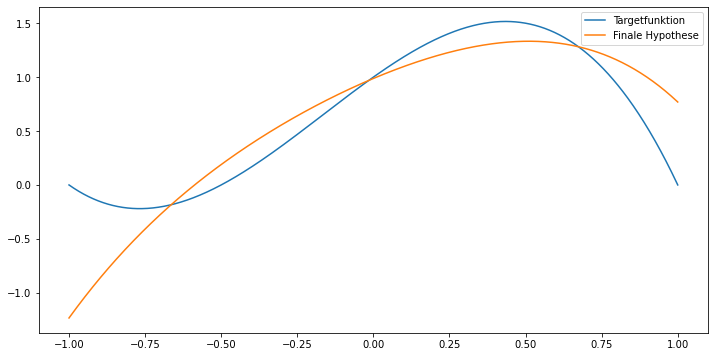

In [21]:
target = get_target_function()
x_cords = np.linspace(-1, 1, 1000)
plt.plot(x_cords, target(x_cords), label="Targetfunktion")
plt.plot(x_cords, get_final_g(x_cords, w_reg), label="Finale Hypothese")
plt.legend()
plt.show()

(6) Erstellen Sie denselben Plot wie in Schritt (5), nur fügen Sie dieses Mal noch eine weitere finale Hypothese hinzu, nämlich diejenige, die Sie erhalten, wenn Sie $\lambda=0$ setzen. Das Ergebnis für $\lambda=0$ entspricht der unregularisierten Lösung, also der Lösung, die Sie mit klassischer linearer Regression ohne Weight Decay erhalten. Welche der Hypothesen approximiert die Target Function besser?

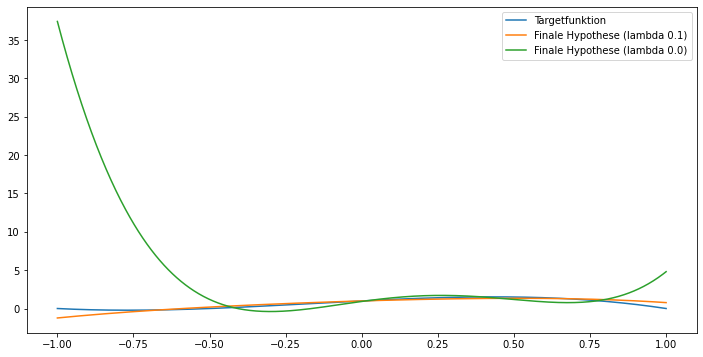

In [22]:
w_reg2 = lin_reg_regularized(phi_4(x), y, 0.0)
plt.plot(x_cords, target(x_cords), label="Targetfunktion")
plt.plot(x_cords, get_final_g(x_cords, w_reg), label="Finale Hypothese (lambda 0.1)")
plt.plot(x_cords, get_final_g(x_cords, w_reg2), label="Finale Hypothese (lambda 0.0)")
plt.legend()
plt.show()

(7) Erstellen Sie eine **interaktive Visualisierung** mit einem Slider, mit dem Sie den Wert $\lambda$ einstellen können und die automatisch einen Plot mit der entsprechenden regularisierte Lösung zeigt, die dem Wert $\lambda$ entspricht. 
1. Kommentieren Sie dazu den unteren Code ein und vervollständigen Sie die Funktion `showPlot`. Innerhalb der Funktion steht die Variable `lamb` zur Verfügung, die den durch den Slider eingestellten Wert von $\lambda$ enthält. 
2. Führen Sie in der Funktion `showPlot` regularisierte Regression mit $\lambda$ durch. Visualisieren Sie in der Funktion sowohl die Target Function als auch die regularisierte Lösung. [Stellen Sie sicher](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylim.html), dass der gezeigte y-Achsenabschnitt zwischen -1 und 2 liegt.
3. Führen Sie die entsprechende Code-Zelle aus und schieben den Slider hin und her. Beobachten Sie, wie sich die Kurven verändern. Beschreiben Sie qualitativ, wie sich die regularisierte Lösung ändert, wenn der Wert für $\lambda$ erhöht wird.

In [23]:
from ipywidgets import interact
import ipywidgets as widgets

@interact(lamb=widgets.FloatSlider(min=0,max=1.5,step=0.1,value=0))
def showPlot(lamb):
    # 1. perform regularized linear regression with nonlinear feature transform
    w_reg_dyn = lin_reg_regularized(phi_4(x), y, lamb)
    # 2. Visualize final hypothesis
    plt.plot(x_cords, get_final_g(x_cords, w_reg_dyn), label="Finale Hypothese")
    # 3. Visualize target function
    plt.plot(x_cords, target(x_cords), label="Targetfunktion")
    # 4. Make sure that y-axis shows region between -1 and 2
    plt.ylim(-1, 2)
    plt.legend()

interactive(children=(FloatSlider(value=0.0, description='lamb', max=1.5), Output()), _dom_classes=('widget-in…

(8) Schreiben Sie eine Funktion, die den Fehler $E_\text{out}$ im Interval $x\in[-1, 1]$ ermittelt. Sei $y(x)$ der Wert der Target Function an der Stelle $x$ und sei $g_\lambda(x)$ der Wert Ihrer finalen Hypothese an der Stelle $x$ für regularisierte Regression mit dem Regularisierungsparameter $\lambda$. Dann sei der Out-of-Sample Fehler $E_\text{out}(\lambda)$ im Interval $x\in[-1, 1]$ definiert als die mittlere quadratische Abweichung zwischen $g_\lambda$ und $y$ in diesem Interval, 
$$E_\text{out}(\lambda) = \frac{1}{K}\sum_k (g_\lambda(x_k) - y(x_k))^2,$$ wobei wir hier $K=50$ Stützstellen $x_k$ wählen, die das Interval $[-1, 1]$ gleichmäßig in [äquidistanten Abständen abtasten](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html). Hinweis: Sie können sich an Ihrem Code aus Übung 3, Aufgabe 3.2, Schritt 5 bedienen, sollten Sie diese Teilaufgabe bearbeitet haben.

In [24]:
K = 50
x_k = np.linspace(-1, 1, K)

def e_out(lamb):
    w_reg3 = lin_reg_regularized(phi_4(x), y, lamb)
    g_xk = get_final_g(x_k, w_reg3)
    y_xk = target(x_k)
    return 1/K * np.sum((g_xk - y_xk)**2)

(9) Ermitteln Sie $E_\text{out}(\lambda)$ für $\lambda\in\{0, 0.1, \ldots, 2\}$. Visualisieren Sie $E_\text{out}(\lambda)$ als Funktion von $\lambda$ in einem Plot. Was fällt Ihnen auf?

**Hinweise**
* Für eine bessere Darstellung des Phänomens [wählen Sie bitte eine logarithmische Darstellung des Wertebereichs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html) von $E_\text{out}$.
* Geben Sie sich zusätzlich die Werte von $E_\text{out}$ aus, die für sehr kleine $\lambda$ Werte erreicht werden.

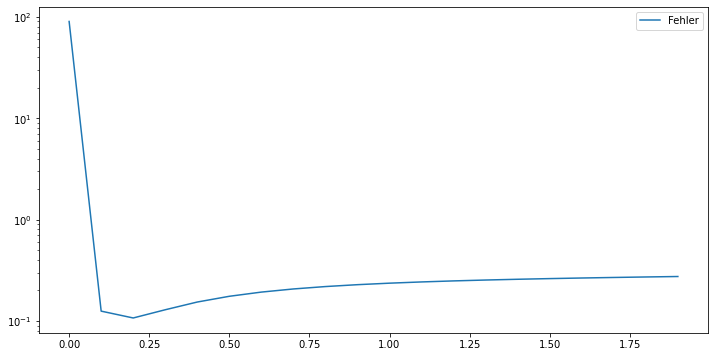

0.1251502278714122
0.400692691253486
1.8949620042546134
89.27633533844937


In [25]:
lambdas = np.arange(0, 2, 0.1)
e_out_vec = np.vectorize(e_out)
plt.plot(lambdas, e_out_vec(lambdas), label="Fehler")
plt.yscale('log')
plt.legend()
plt.show()

print(e_out(1/10))
print(e_out(1/100))
print(e_out(1/10000))
print(e_out(1/10000000))